BCSE331L Exploratory Data Analysis - Course Project

Ashwin S Narayanan - 22BDS0111

Loading Dataset

In [39]:
import pandas as pd
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv"
df = pd.read_csv(url)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Dimensions

In [40]:
df.shape

df.columns


Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Summary Statistics

In [41]:
df.describe()

df.describe(include='object')


,country,sex,age,country-year,gdp_for_year ($),generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Austria,male,15-24 years,Uzbekistan2014,"63,067,077,179",Generation X
freq,382,13910,4642,12,12,6408


Data Cleaning

In [42]:
df.dtypes
df.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,False,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df.isnull().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


In [44]:
df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].mean())

In [45]:
df = df.drop_duplicates()

In [46]:
df.isnull().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,0
gdp_for_year ($),0


In [47]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

Univariate Analysis

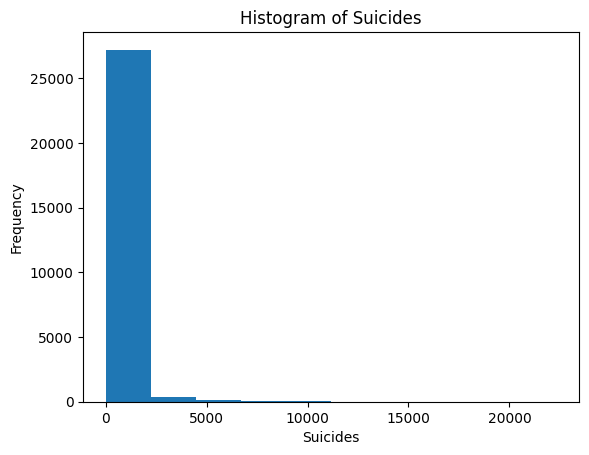

In [49]:
plt.hist(df['suicides_no'])
plt.xlabel('Suicides')
plt.ylabel('Frequency')
plt.title('Histogram of Suicides')
plt.show()

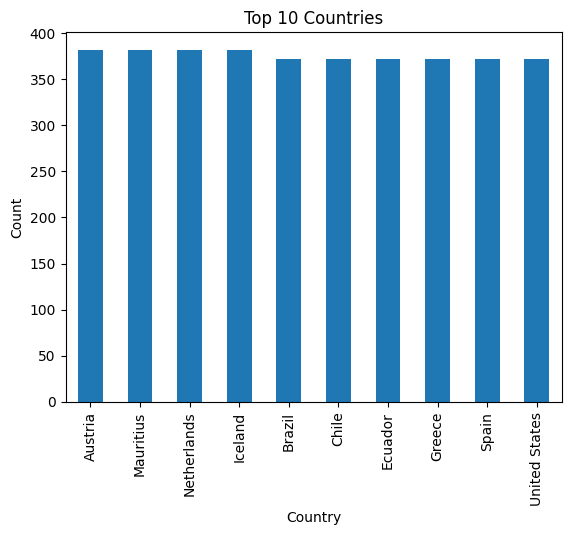

In [50]:
country_counts = df['country'].value_counts().head(10)
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.show()

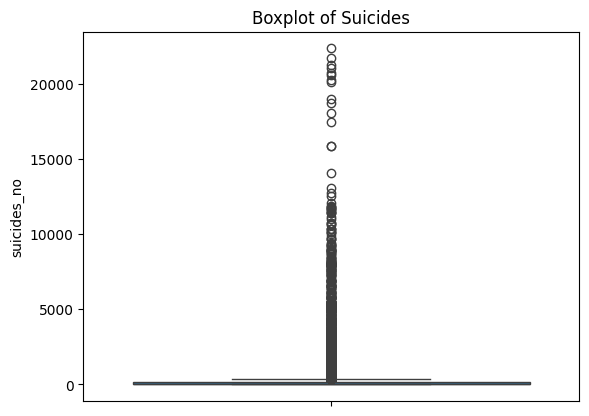

In [51]:
sns.boxplot(y=df['suicides_no'])
plt.title('Boxplot of Suicides')
plt.show()

Bivariate Analysis

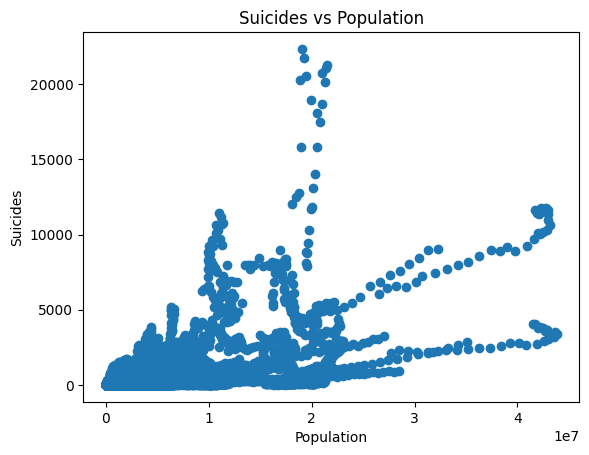

In [52]:
plt.scatter(df['population'], df['suicides_no'])
plt.xlabel('Population')
plt.ylabel('Suicides')
plt.title('Suicides vs Population')
plt.show()

In [53]:
df.corr(numeric_only=True)


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.209036,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.062669,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.057279,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.037290,0.001785
HDI for year,0.209036,0.062669,0.057279,0.037290,1.000000,0.505505
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,0.505505,1.000000


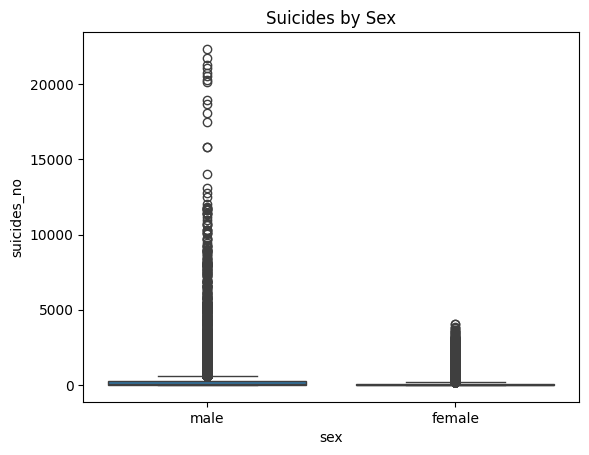

In [54]:
sns.boxplot(x='sex', y='suicides_no', data=df)
plt.title('Suicides by Sex')
plt.show()

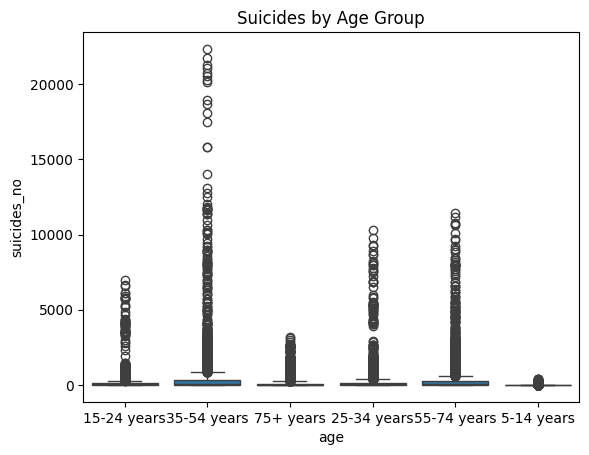

In [55]:
sns.boxplot(x='age', y='suicides_no', data=df)
plt.title('Suicides by Age Group')
plt.show()

Multivariate Analysis

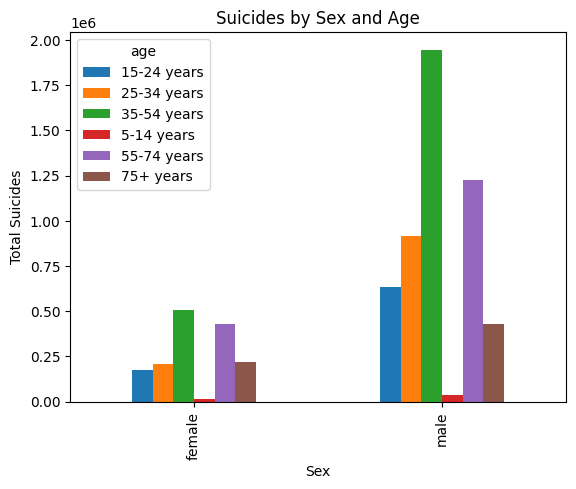

In [56]:
grouped = df.groupby(['sex', 'age'])['suicides_no'].sum().unstack()
grouped.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Total Suicides')
plt.title('Suicides by Sex and Age')
plt.show()


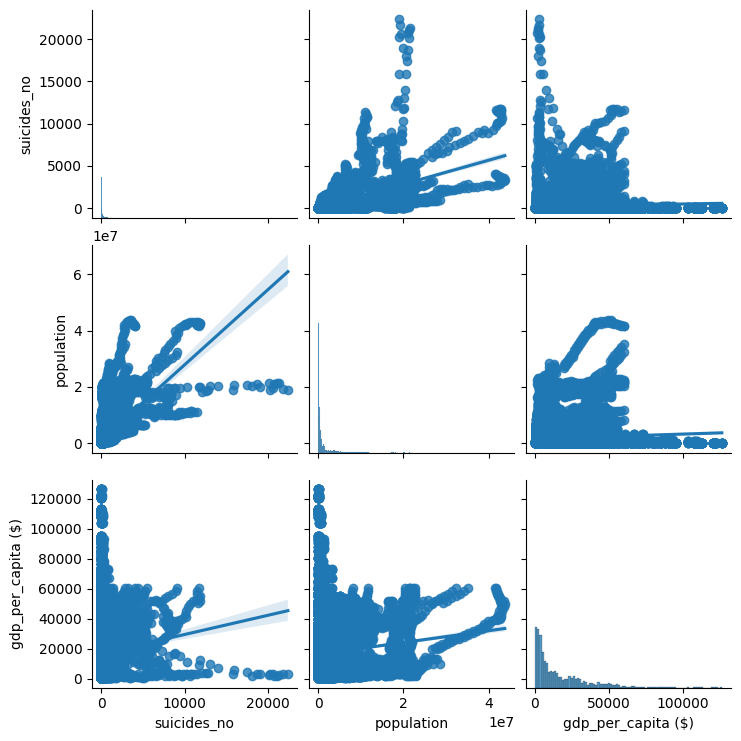

In [57]:
num_cols = ['suicides_no', 'population', 'gdp_per_capita ($)']
sns.pairplot(df[num_cols], kind='reg')


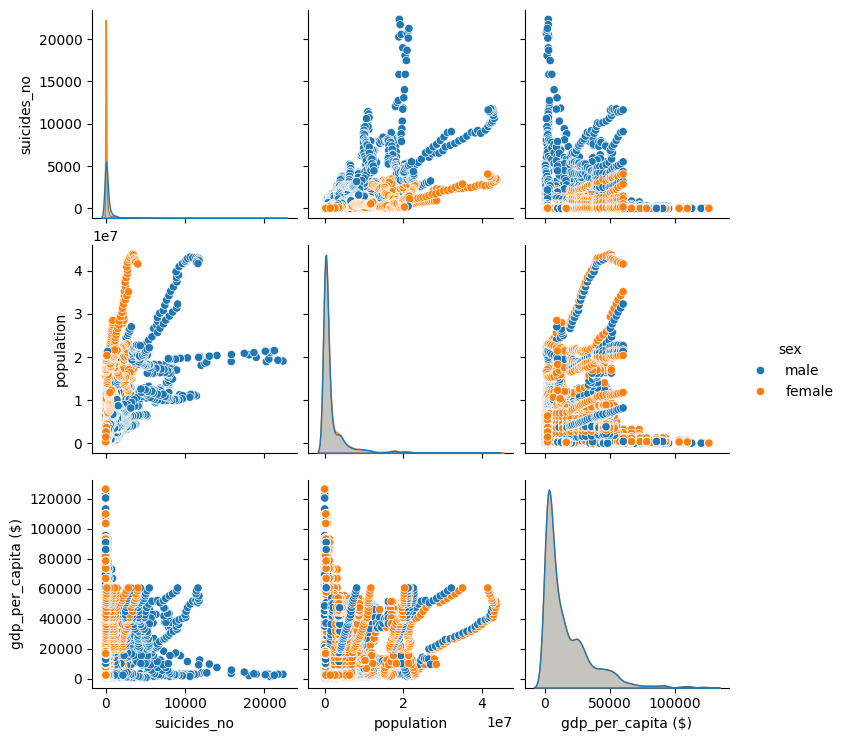

In [58]:
sns.pairplot(df[['suicides_no', 'population', 'gdp_per_capita ($)', 'sex']],
             hue='sex')

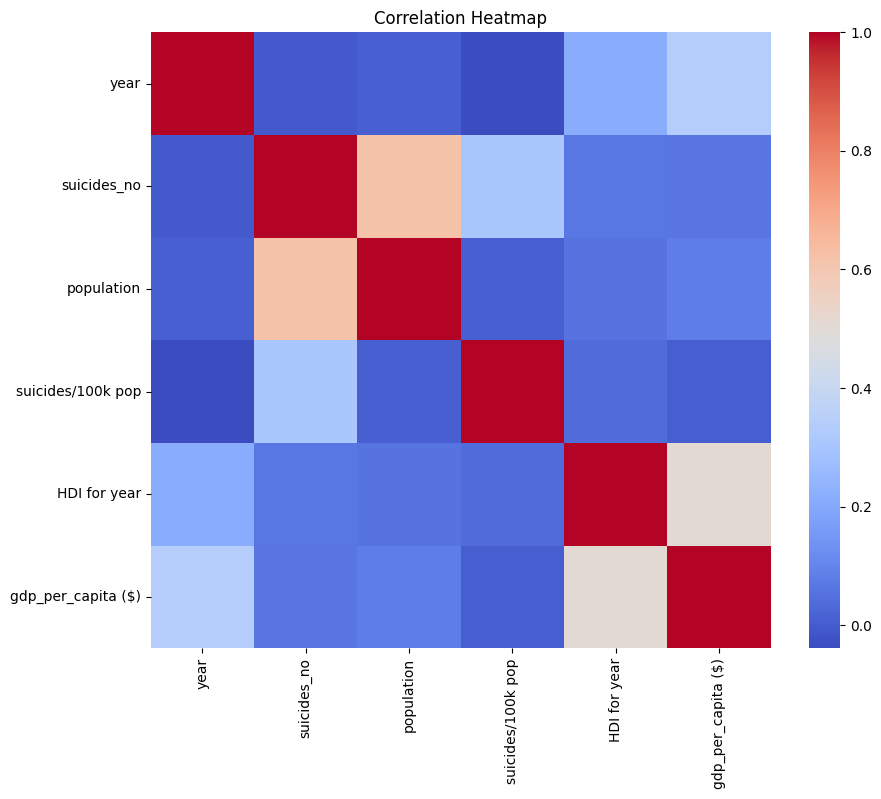

In [59]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
